In [1]:
#Importing the libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import stats
from scipy.stats import t as t 
from scipy.optimize import curve_fit
from scipy.constants import *

from uncertainties import *
from uncertainties.umath import *



In [2]:
#Reading data

I_18 = pd.read_csv('data/I_18.txt', delimiter='\t')
I_19 = pd.read_csv('data/I_19.txt', delimiter='    ')
I_I = pd.read_csv('data/I_I.txt', delimiter='    ')


/tmp/ipykernel_102316/2105623087.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  I_19 = pd.read_csv('data/I_19.txt', delimiter='    ')
/tmp/ipykernel_102316/2105623087.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  I_I = pd.read_csv('data/I_I.txt', delimiter='    ')


In [3]:
I_18

,U_f,I_f,U_a,I_a
0,4.261249,1.804863,-6.5800,0.001369
1,4.261600,1.804839,-5.9860,0.000487
2,4.263284,1.804895,-5.5780,0.000344
3,4.262378,1.804930,-4.9866,0.000454
4,4.258985,1.804881,-4.5852,0.000144
...,...,...,...,...
66,4.248842,1.804817,397.1000,12.378954
67,4.248766,1.804765,422.4000,12.422846
68,4.248804,1.804817,447.4000,12.466986
69,4.248888,1.804736,472.4000,12.511652


In [4]:
I_19

,U_f,I_f,U_a,I_a
0,4.625353,1.905246,-4.98,0.001908
1,4.626812,1.905193,-4.49,0.000880
2,4.624169,1.905179,-4.09,0.002646
3,4.623530,1.905281,-3.99,0.002059
4,4.625933,1.905274,-3.49,0.002252
...,...,...,...,...
65,4.612724,1.905157,373.80,31.837455
66,4.612821,1.905203,399.00,31.949261
67,4.613474,1.905196,419.00,32.062059
68,4.613457,1.905122,449.00,32.166672


In [5]:
I_I

,U_f,I_f,U_a,I_a
0,4.238210,1.804927,19.95,10.691968
1,4.274677,1.814819,19.95,11.779869
2,4.310400,1.824869,19.95,12.981778
3,4.347922,1.835040,19.95,14.303565
4,4.387653,1.845147,19.95,15.770613
5,4.427144,1.855155,19.95,17.347479
6,4.465017,1.865149,19.95,19.084624
7,4.503692,1.875080,19.95,20.974632
8,4.541322,1.884996,19.95,23.027445
9,4.573764,1.894913,19.95,25.267850


In [6]:
# Constants and values

def uncert(data_input, uncert_inst):
    t_coeff = t.ppf((1 + 0.6827)/2, len(data_input)-1)
    return np.sqrt((np.std(data_input)/np.sqrt(len(data_input)))**2 + uncert_inst**2)*t_coeff

L = 25*10**(-3) #m 
D = 15*10**(-3) #m
R = 17*10**(-3) #m
r = 0.045*10**(-3) #m

alpha_t = 4.83 * 10**(-3) #1/K
rho_t = 4.89 * 10**(-8) #Ohm*m
d_S = 7.76*10**6 #1/m

In [7]:
#Canculation
I_18['I_a'] = I_18['I_a'] * 10**(-6)
I_19['I_a'] = I_19['I_a'] * 10**(-6)
I_I['I_a'] = I_I['I_a'] * 10**(-6)

I_18['lnI_a'] = np.log(I_18['I_a'])
I_19['lnI_a'] = np.log(I_19['I_a'])

I_18['sqrtU_a'] = np.sqrt(I_18['U_a'])
I_19['sqrtU_a'] = np.sqrt(I_19['U_a'])

delta_I_18 = np.exp(I_18['lnI_a'][70]) - np.exp(I_18['lnI_a'][26])
delta_I_19 = np.exp(I_19['lnI_a'][69]) - np.exp(I_19['lnI_a'][24])

print('delta_I_18 =', delta_I_18*10**6)
print('delta_I_19 =', delta_I_19*10**6)

E = 500 * ((L-D)/D)*(1/(r*np.log(R/r)))

print('E_18 =', E*10**(-6), '10^6')
print('E_19 =', E*10**(-6), '10^6')

print('U_nas_18 =', I_18['U_a'][26])
print('U_nas_19 =', I_19['U_a'][24])

print('I_nas_18 =', I_18['I_a'][26]*10**6)
print('I_nas_19 =', I_19['I_a'][24]*10**6)

I_I['R'] = I_I['U_f']/I_I['I_f']
I_I['T'] = ((I_I['R'] * d_S**(-1))/rho_t - 1)* alpha_t**(-1) + 273.15
I_I['x'] = I_I['T']**(-1) * 10**(4)
I_I['y'] = np.log(I_I['I_a'] / I_I['T']**2)

delta_I_18 = 4.750488660000002
delta_I_19 = 13.363546399999993
E_18 = 1.2482347962942277 10^6
E_19 = 1.2482347962942277 10^6
U_nas_18 = 6.380000000000001
U_nas_19 = 6.48
I_nas_18 = 7.79977334
I_nas_19 = 19.0089579


/home/wall-st/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/wall-st/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
# Linear regression for I_18

slope, intercept, r_value, p_value, std_err = stats.linregress(I_18['U_a'][10:14], I_18['lnI_a'][10:14])

I_18_alpha = ufloat(slope, std_err)

T_I_18 = e/(I_18_alpha*k)
print('T_I_18 =', T_I_18)

#Best fit line 
I_18_fit = slope * np.array(I_18['U_a'][5:16]) + intercept

# Linear regression for I_19

slope, intercept, r_value, p_value, std_err = stats.linregress(I_19['U_a'][8:12], I_19['lnI_a'][8:12])

I_19_alpha = ufloat(slope, std_err)

T_I_19 = e/(I_19_alpha*k)
print('T_I_19 =', T_I_19)

#Best fit line
I_19_fit = slope * np.array(I_19['U_a'][3:15]) + intercept

T_I_18 = (4.08+/-0.34)e+03
T_I_19 = (4.65+/-0.32)e+03


In [9]:
delta_I_18_teor = exp(I_18['lnI_a'][26] + sqrt(e**3/(4*np.pi*epsilon_0*k**2*T_I_18**2)) * sqrt(E))
delta_I_19_teor = exp(I_19['lnI_a'][24] + sqrt(e**3/(4*np.pi*epsilon_0*k**2*T_I_19**2)) * sqrt(E))

print('delta_I_18_teor =', delta_I_18_teor*10**6)
print('delta_I_19_teor =', delta_I_19_teor*10**6)

delta_I_18_teor = 8.80+/-0.09
delta_I_19_teor = 21.13+/-0.15


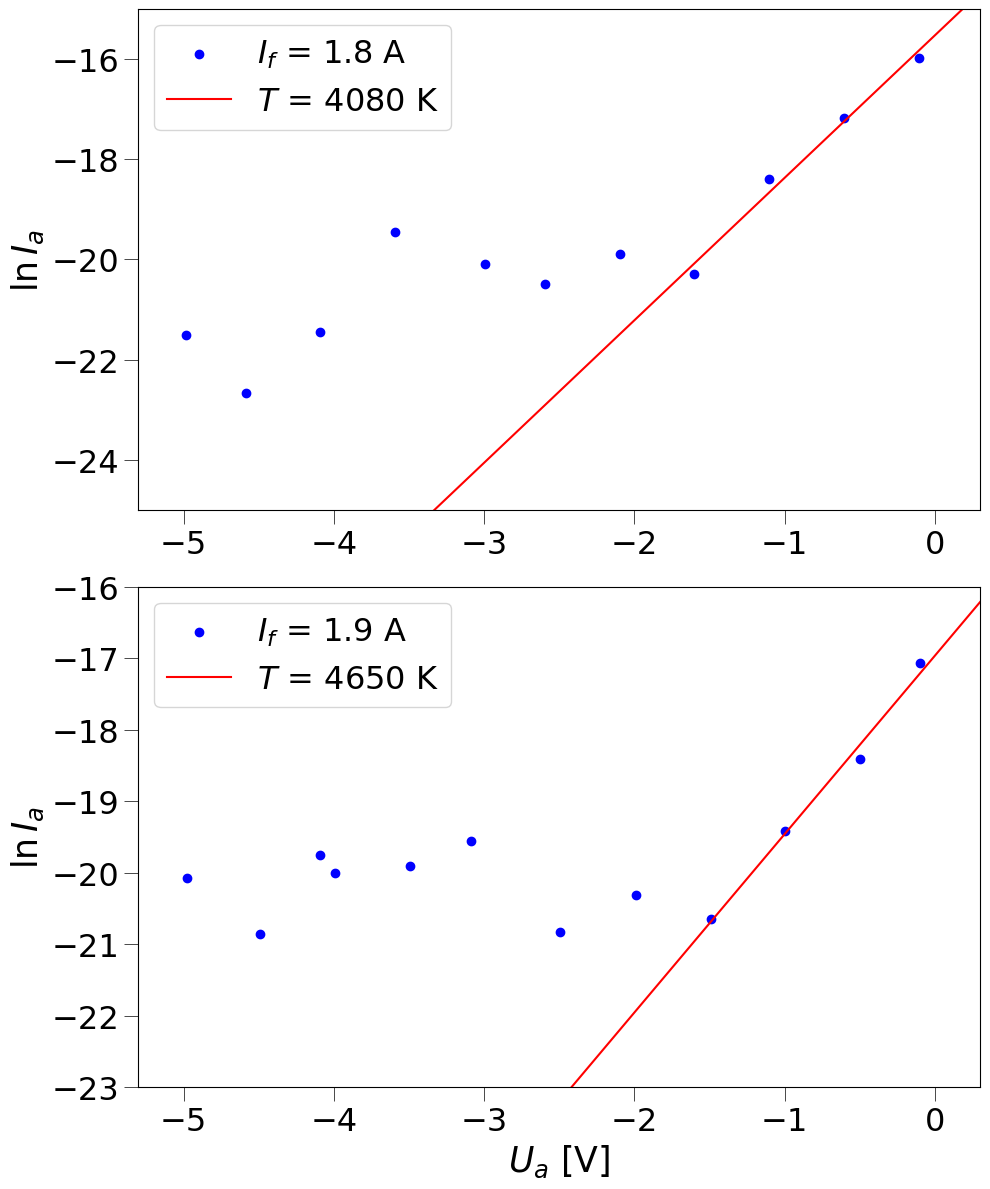

In [10]:
# Define the figure and the subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Define the font size
ax_l_size = 25
l_size = 23

# Plot for If = 1.8 A
# ax1.set_xlabel(r"$U_a$ [V]")
ax1.set_ylabel(r"$\ln I_a$")
ax1.xaxis.label.set_fontsize(ax_l_size)
ax1.yaxis.label.set_fontsize(ax_l_size)
ax1.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=l_size)
ax1.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=l_size)
ax1.set_xlim(-5.3,0.3)
ax1.set_ylim(-25,-15)
ax1.scatter(I_18['U_a'], I_18['lnI_a'], color='blue', label=r'$I_f$ = 1.8 A')
ax1.plot(I_18['U_a'][5:16], I_18_fit, color='red', label=r'$T$ = 4080 K')

ax1.legend(loc='upper left', fontsize=23)

# Plot for If = 1.9 A
ax2.set_xlabel(r"$U_a$ [V]")
ax2.set_ylabel(r"$\ln I_a$")
ax2.xaxis.label.set_fontsize(ax_l_size)
ax2.yaxis.label.set_fontsize(ax_l_size)
ax2.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=l_size)
ax2.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=l_size)
ax2.set_xlim(-5.3,0.3)
ax2.set_ylim(-23,-16)
ax2.scatter(I_19['U_a'], I_19['lnI_a'], color='blue', label=r'$I_f$ = 1.9 A')
ax2.plot(I_19['U_a'][3:15], I_19_fit, color='red', label=r'$T$ = 4650 K')

ax2.legend(loc='upper left', fontsize=23)

plt.tight_layout()
plt.show()


fig.savefig('images/nabeh.png', bbox_inches='tight')

In [11]:
# Linear regression for I_18

slope, intercept, r_value, p_value, std_err = stats.linregress(I_18['sqrtU_a'][50:70], I_18['lnI_a'][50:70])

I_18_alpha = ufloat(slope, std_err)
print('I_18_alpha =', I_18_alpha)

#Best fit line 
I_18_fit = slope * np.array(I_18['sqrtU_a'][10:70]) + intercept

# Linear regression for I_19

slope, intercept, r_value, p_value, std_err = stats.linregress(I_19['sqrtU_a'][50:69], I_19['lnI_a'][50:69])

I_19_alpha = ufloat(slope, std_err)
print('I_19_alpha =', I_19_alpha)

#Best fit line
I_19_fit = slope * np.array(I_19['sqrtU_a'][10:69]) + intercept

I_18_alpha = 0.0089+/-0.0006
I_19_alpha = 0.0081+/-0.0004


I_nas_0 = -11.761415883665308 I_nas = -11.285769016110368
I_nas_0 = -10.870600221483096 I_nas = -10.338201128174635


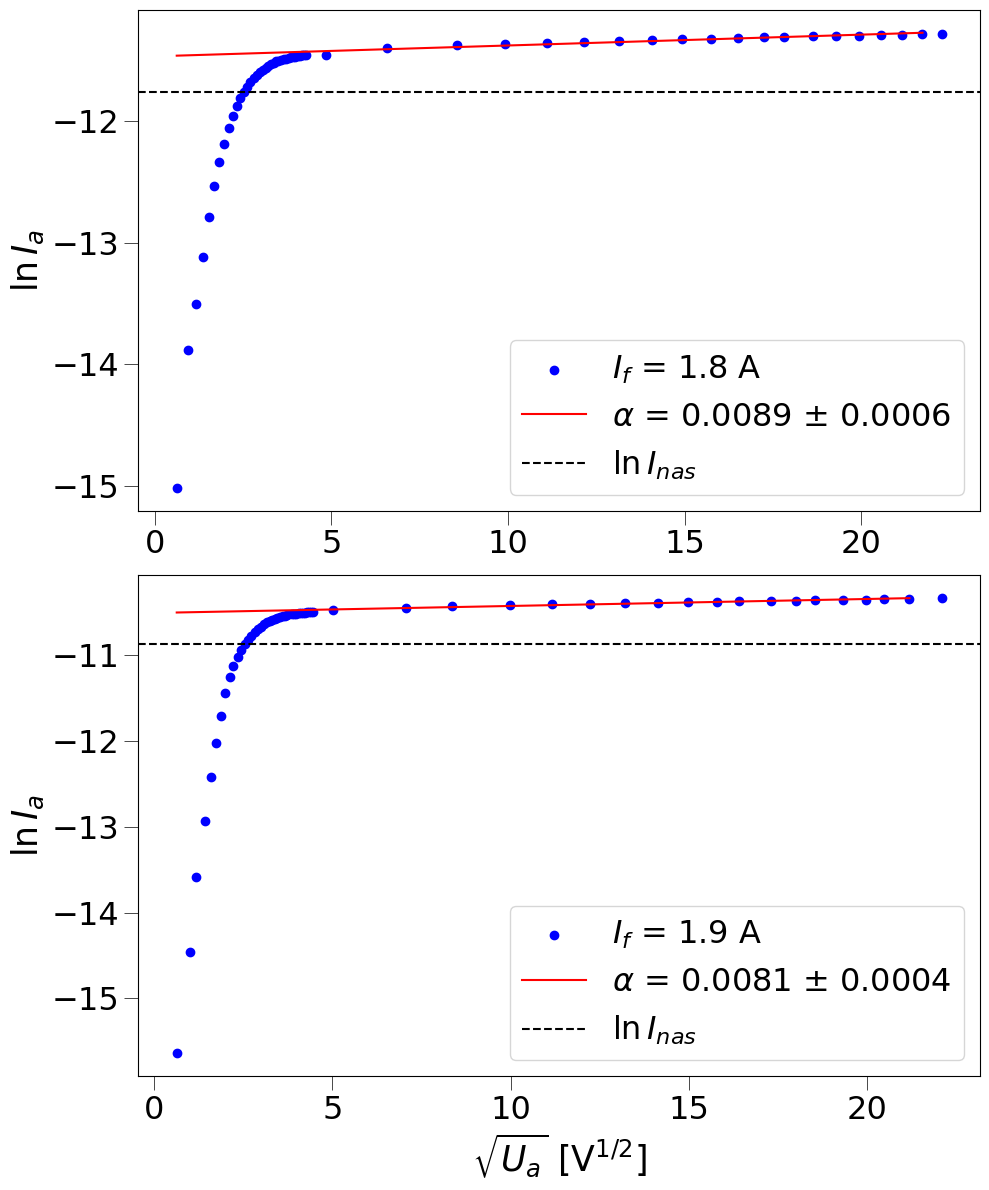

In [12]:
# Define the figure and the subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Define the font size
ax_l_size = 25
l_size = 23

# Plot for If = 1.8 A
# ax1.set_xlabel(r"$U_a$ [V]")
ax1.set_ylabel(r"$\ln I_a$")
ax1.xaxis.label.set_fontsize(ax_l_size)
ax1.yaxis.label.set_fontsize(ax_l_size)
ax1.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=l_size)
ax1.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=l_size)
# ax1.set_xlim(-1, 20)
ax1.scatter(I_18['sqrtU_a'], I_18['lnI_a'], color='blue', label=r'$I_f$ = 1.8 A')
ax1.plot(I_18['sqrtU_a'][10:70], I_18_fit, color='red', label=r'$\alpha$ = 0.0089 $\pm$ 0.0006')

ax1.axhline(y=I_18['lnI_a'][26], color='black', linestyle='--', label=r'$\ln I_{nas}$')
print('I_nas_0 =', I_18['lnI_a'][26], 'I_nas =', I_18['lnI_a'][70])

ax1.legend(loc='lower right', fontsize=23)

# Plot for If = 1.9 A
ax2.set_xlabel(r"$\sqrt{U_a}$ [V$^{1/2}$]")
ax2.set_ylabel(r"$\ln I_a$")
ax2.xaxis.label.set_fontsize(ax_l_size)
ax2.yaxis.label.set_fontsize(ax_l_size)
ax2.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=l_size)
ax2.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=l_size)
# ax2.set_xlim(-1, 20)
ax2.scatter(I_19['sqrtU_a'], I_19['lnI_a'], color='blue', label=r'$I_f$ = 1.9 A')
ax2.plot(I_19['sqrtU_a'][10:69], I_19_fit, color='red', label=r'$\alpha$ = 0.0081 $\pm$ 0.0004')

ax2.axhline(y=I_19['lnI_a'][24], color='black', linestyle='--', label=r'$\ln I_{nas}$')
print('I_nas_0 =', I_19['lnI_a'][24], 'I_nas =', I_19['lnI_a'][69])

ax2.legend(loc='lower right', fontsize=23)

plt.tight_layout()
plt.show()


fig.savefig('images/nas.png', bbox_inches='tight')

In [13]:
# Define the polynomial function

def polynomial_fit(x, A, B):
    return -A*x + np.log(B)

# Use curve_fit to find the parameters A and B
initial_guess = [4.37, 130*10**3]  # Initial guess for parameters A and B
params, covariance = curve_fit(polynomial_fit, I_I['x'], I_I['y'], p0=initial_guess)

# Extract the optimized parameters
A_optimized, B_optimized = params
A_error, B_error = np.sqrt(np.diag(covariance))

A_comb = ufloat(A_optimized, A_error)
B_comb = ufloat(B_optimized, B_error)

# Print the optimized parameters
print('A =', A_comb)
print('B =', B_comb)

#Best-fit line

fit_val = polynomial_fit(I_I['x'], A_optimized, B_optimized)

w = A_comb * k * 6.242*10**18 * 10**4
print('w =', w)


A = 4.12+/-0.07
B = (1.1+/-0.6)e+02
w = 3.55+/-0.06


/tmp/ipykernel_102316/2469696322.py:4: RuntimeWarning: invalid value encountered in log
  return -A*x + np.log(B)


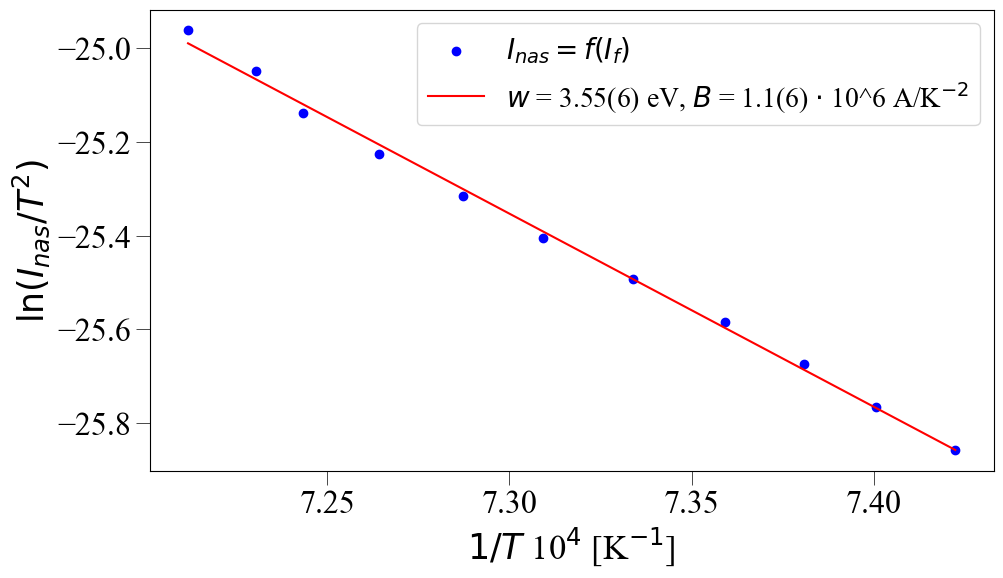

In [14]:
# Plot for I_I

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 6))

# ax.title.set_fontsize(ax_l_size)
ax.set_xlabel(r"$1/T$ 10$^4$ [K$^{-1}$]")
ax.xaxis.label.set_fontsize(ax_l_size)
ax.set_ylabel(r"$\ln (I_{nas}/T^2)$")
ax.yaxis.label.set_fontsize(ax_l_size)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=l_size)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=l_size)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(I_I['x'], I_I['y'], color='blue', label=r'$I_{nas} = f(I_f)$')
ax.plot(I_I['x'], fit_val, color='red', label=r'$w$ = 3.55(6) eV, $B$ = 1.1(6) $\cdot$ 10^6 A/K$^{-2}$')

ax.legend(loc='upper right', fontsize=20)


plt.show() 

fig.savefig('images/R-D.png', bbox_inches='tight')

In [15]:
I_18['I_a'] = I_18['I_a'] * 10**(6)
I_19['I_a'] = I_19['I_a'] * 10**(6)
I_I['I_a'] = I_I['I_a'] * 10**(6)

In [16]:
I_18 = I_18.round(3)
I_19 = I_19.round(3)
I_I = I_I.round(3)

I_18.to_csv('data/I_18_out.csv', index=False)
I_19.to_csv('data/I_19_out.csv', index=False)
I_I.to_csv('data/I_I_out.csv', index=False)